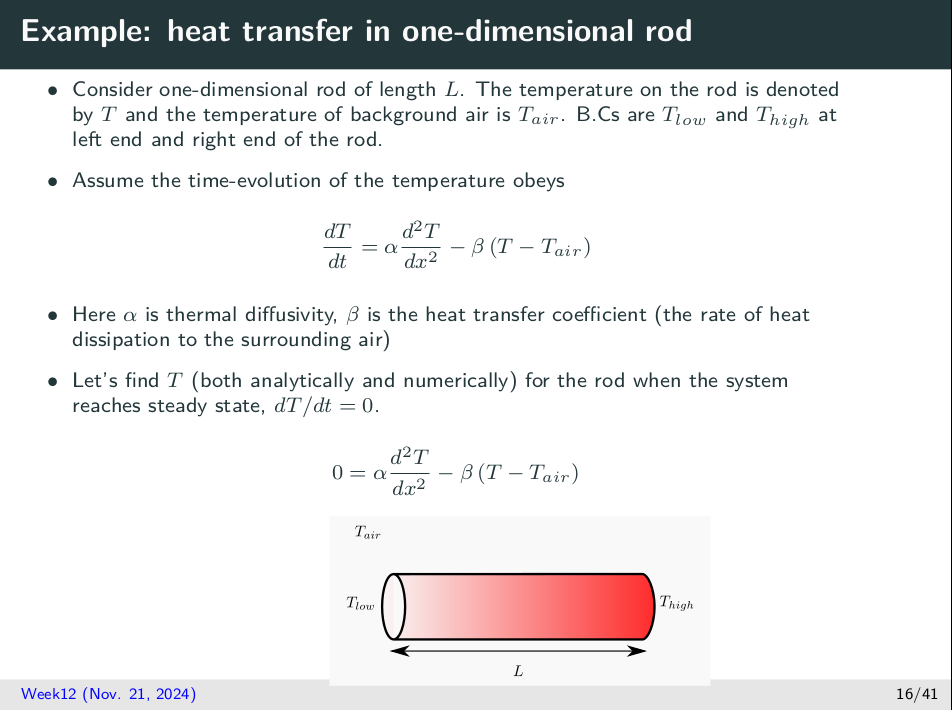

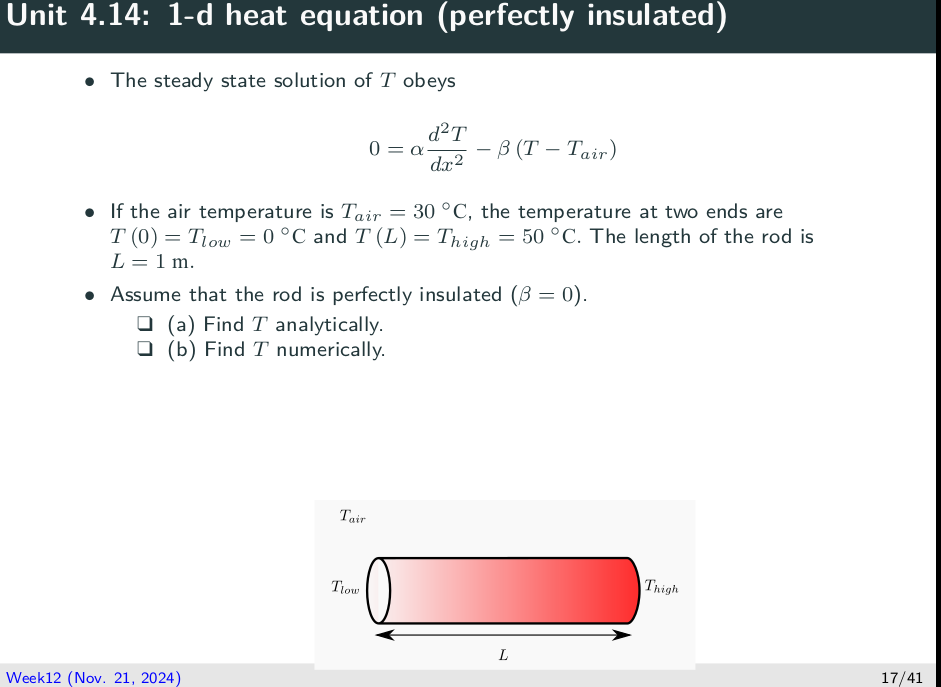

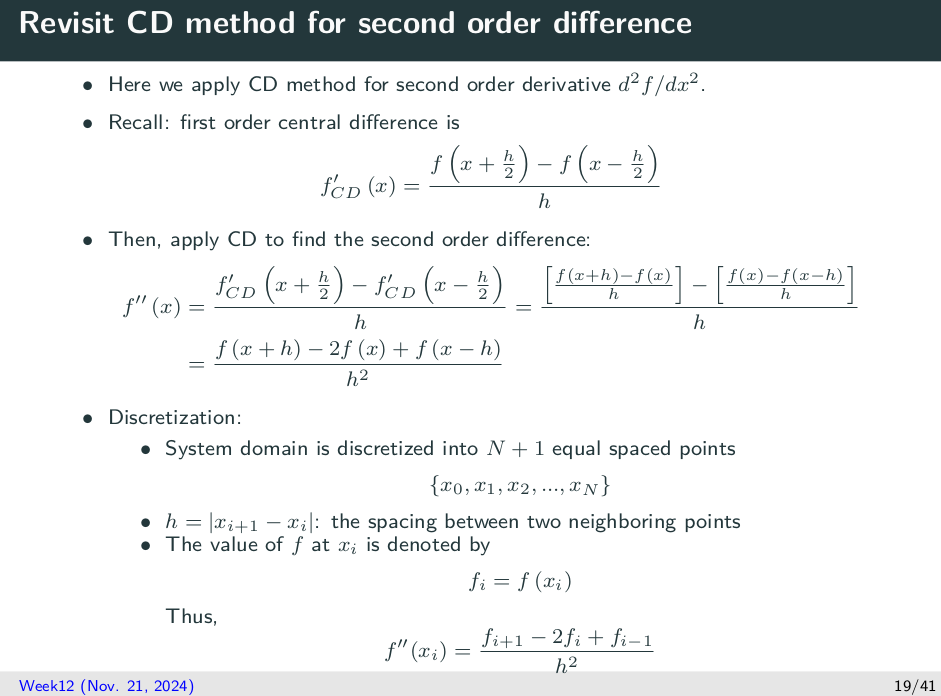

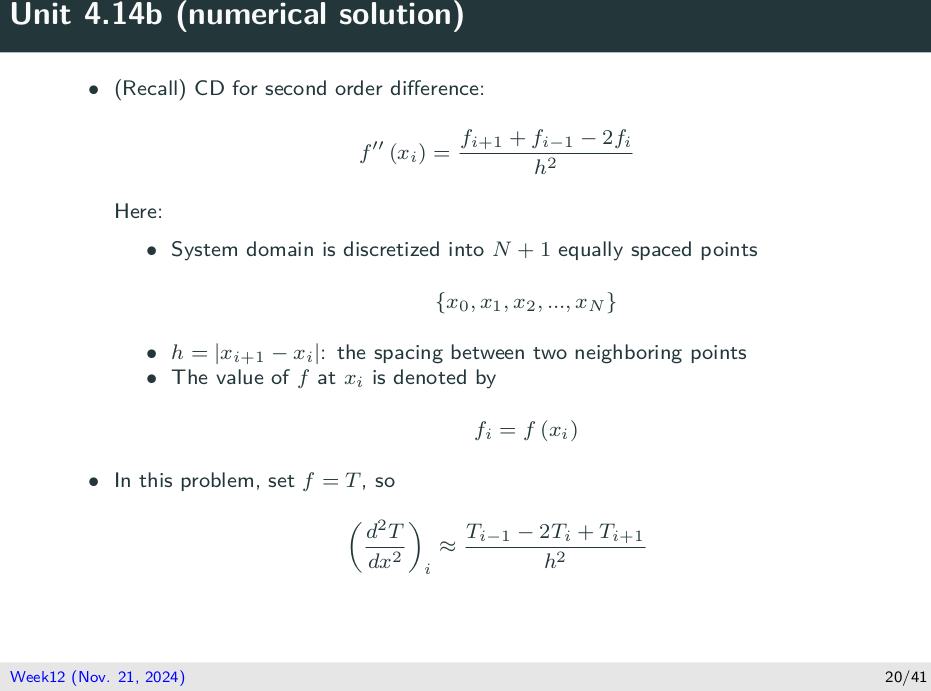

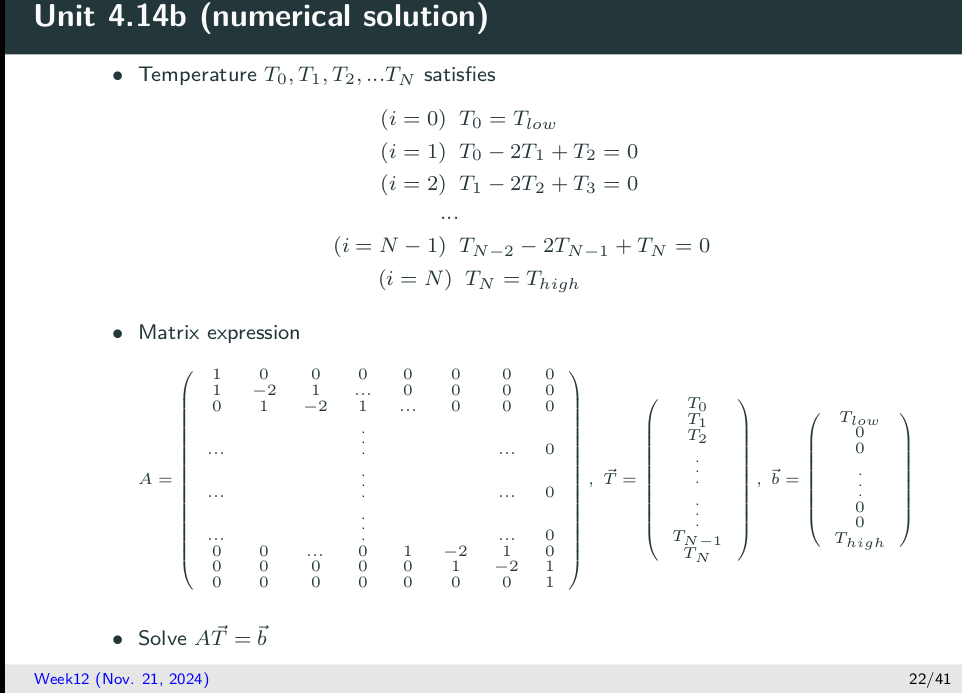

In [12]:
import numpy as np
N = 10
A = np.zeros([N+1,N+1])  
b = np.zeros(N+1)
#print (A)

for i in range(1,N):
    for j in range(1,N):
        if j == i:# Set the diagonals to -2
            A[i, j] = -2.
        elif j == i+1: # non-zero off-diagonals, upper part
            A[i,j] = 1.
        elif j == i-1: # non-zero off-diagonals, upper part
            A[i,j] = 1.


#===== Boundary Conditions =====            
# Boundary Conditions for A
A[0,0]  = 1.
A[1,0] = 1.
A[N-1,N] = 1.
A[N,N] = 1.
# Boundary Conditions for b
b[0]  = 0.
b[N] = 50.

#===
print (A)
print ("b=",b)


[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
b= [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 50.]


[ 0.  5. 10. 15. 20. 25. 30. 35. 40. 45. 50.]


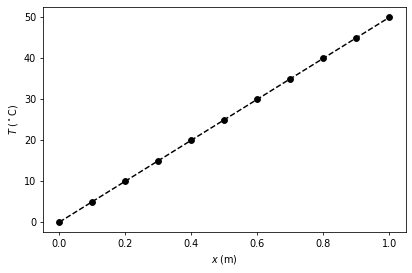

In [17]:
import matplotlib.pyplot as plt
#=====
T_arr = np.linalg.solve(A,b)
print (T_arr)
Lx = 1. #
h = float(Lx)/N # step size for Finite Difference
x_arr = h * (np.arange(N+1))
#print (x_arr)
fig = plt.figure( dpi = 70 ) # dots per inch
fig.set_size_inches(6,4)
plt.plot(x_arr, T_arr,'--ko',label = 'Numerical Solution')
plt.xlabel(r'$x\; \rm (m)$')
plt.ylabel(r'$T\; \rm ( ^\circ C)$')
#plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig("Unit_4.14b_1d_beta_0.png")

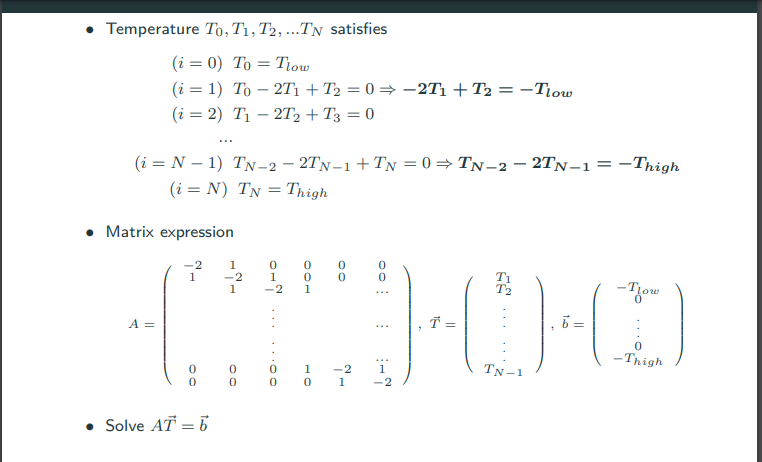

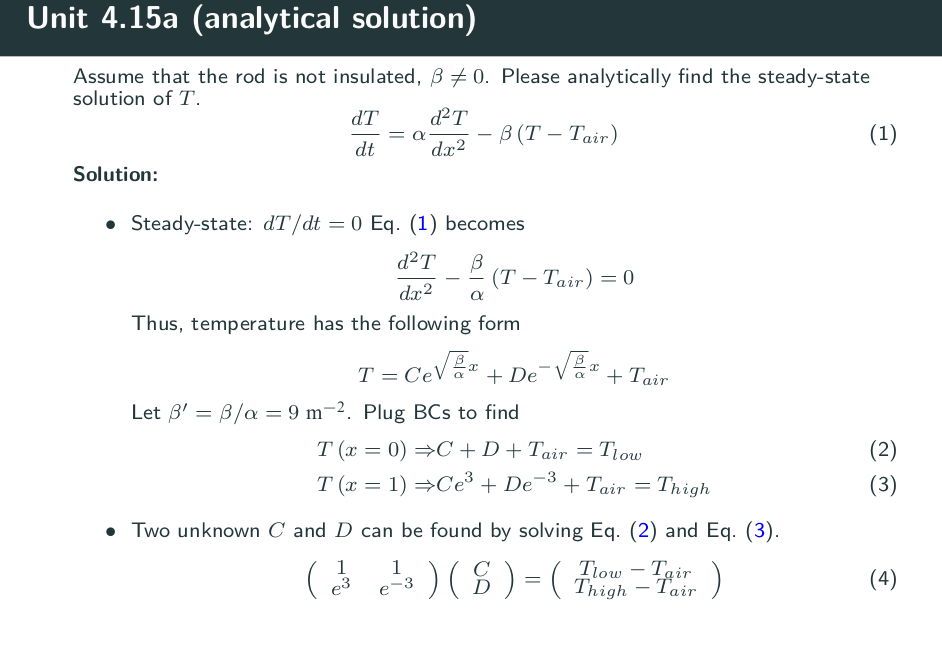

0.0009080604317300221 -30.00090806043173


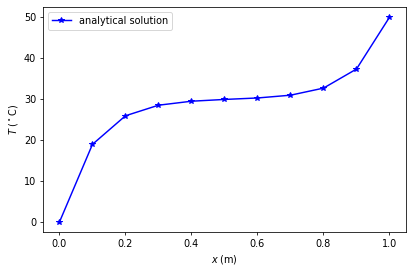

In [25]:
import numpy as np
import matplotlib.pyplot as plt

T_air, T_low, T_high = 30.0, 0.0, 50.0  # degrees




alpha = 1.
Lx = 1. # meters
beta = 100.
beta_prime = beta / alpha


x_arr = np.linspace(0,Lx,11)


M = np.array([[1,1],
              [np.exp(np.sqrt(beta/alpha)),1./np.exp(np.sqrt(beta/alpha))]]) 
b = np.array([T_low - T_air, T_high - T_air])
C,D = np.linalg.solve(M,b)
print (C,D)
T_arr = C * np.exp(np.sqrt(beta/alpha) * x_arr) + D * np.exp(-np.sqrt(beta/alpha) * x_arr) + T_air

fig = plt.figure( dpi = 70 ) # dots per inch
fig.set_size_inches(6,4)
plt.plot(x_arr, T_arr,'-b*',label = 'analytical solution')
plt.xlabel(r'$x\; \rm (m)$')
plt.ylabel(r'$T\; \rm ( ^\circ C)$')
plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig("Unit_4.15a_1d_beta_0.png")

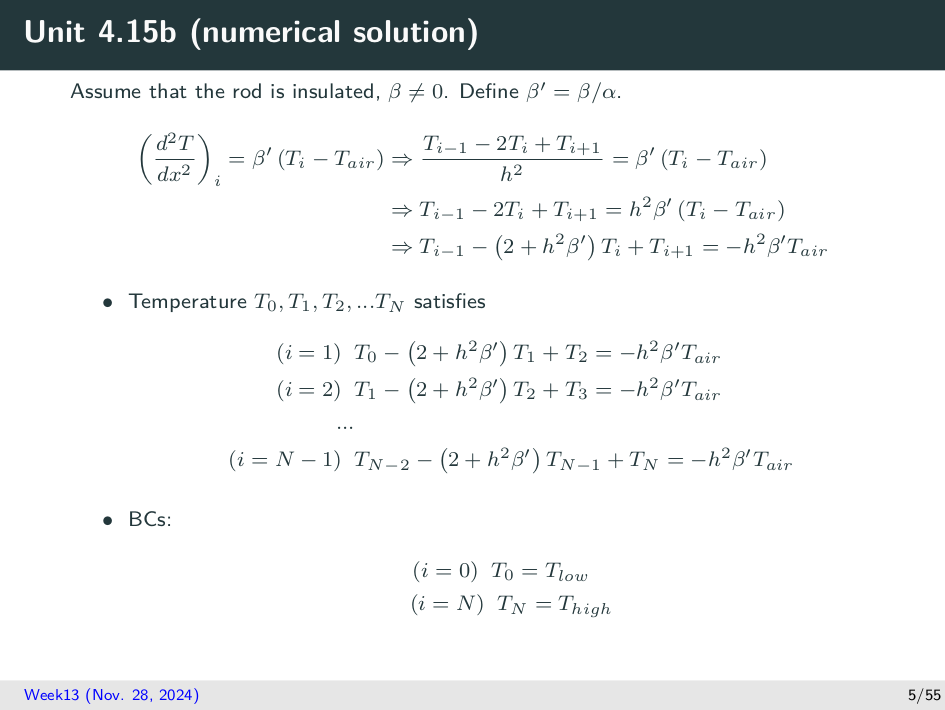

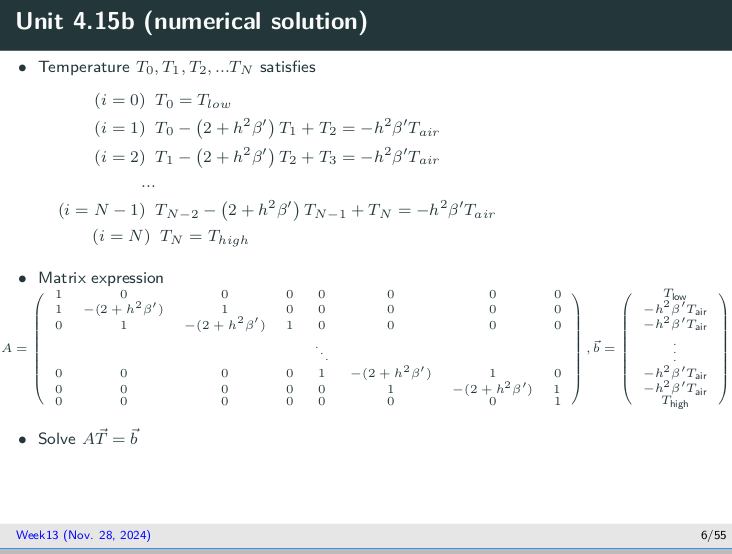

In [27]:
import numpy as np
N = 10
A = np.zeros([N+1,N+1])  
b = np.zeros(N+1)

#h = Lx/N
h = float(Lx)/N
beta = 9.
alpha = 1.
T_air, T_low, T_high = 30.0, 0.0, 50.0  # degrees
beta_prime = beta / alpha 

#print (A)

for i in range(1,N):
    for j in range(1,N):
        if j == i:# Set the diagonals to -2
            A[i, j] = - (2. + h**2. * beta_prime)  
        elif j == i+1: # non-zero off-diagonals, upper part
            A[i,j] = 1.
        elif j == i-1: # non-zero off-diagonals, upper part
            A[i,j] = 1.
            
            
for i in range(1,N):
    b[i] = - h**2. * beta_prime * T_air


#===== Boundary Conditions =====            
# Boundary Conditions for A
A[0,0]  = 1.
A[1,0] = 1.
A[N-1,N] = 1.
A[N,N] = 1.
# Boundary Conditions for b
b[0]  = 0.
b[N] = 50.

#===
print (A)
print ("b=",b)


[[ 1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 1.   -2.09  1.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    1.   -2.09  1.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    1.   -2.09  1.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    1.   -2.09  1.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    1.   -2.09  1.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    1.   -2.09  1.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    1.   -2.09  1.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    1.   -2.09  1.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    1.   -2.09  1.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.  ]]
b= [ 0.  -2.7 -2.7 -2.7 -2.7 -2.7 -2.7 -2.7 -2.7 -2.7 50. ]


[ 0.          8.4093841  14.87561278 19.9806466  24.18393862 27.86378511
 31.35137227 34.96058293 39.01624605 43.88337132 50.        ]


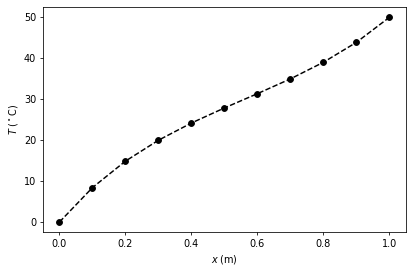

In [28]:
import matplotlib.pyplot as plt
#=====
T_arr = np.linalg.solve(A,b)
print (T_arr)
Lx = 1. #
h = float(Lx)/N # step size for Finite Difference
x_arr = h * (np.arange(N+1))
#print (x_arr)
fig = plt.figure( dpi = 70 ) # dots per inch
fig.set_size_inches(6,4)
plt.plot(x_arr, T_arr,'--ko',label = 'Numerical Solution')
plt.xlabel(r'$x\; \rm (m)$')
plt.ylabel(r'$T\; \rm ( ^\circ C)$')
#plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig("Unit_4.14b_1d_beta_0.png")